In [2]:
!unzip -q /content/dataset1.zip

In [3]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

image_size = (224, 224)
input_shape_vgg16 = (image_size[0], image_size[1], 3)
batch_size = 32
data_dir = "/content/dataset1"
validation_split_ratio = 0.2

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
    validation_split=validation_split_ratio
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=validation_split_ratio
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=False
)

num_classes = train_generator.num_classes
print(f"Số lớp (loại rác): {num_classes}")
print(f"Nhãn lớp: {train_generator.class_indices}")
class_labels = list(train_generator.class_indices.keys())

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Số lớp (loại rác): 6
Nhãn lớp: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

base_model_vgg16 = VGG16(weights='imagenet',
                         include_top=False,
                         input_shape=input_shape_vgg16)

base_model_vgg16.trainable = False

x = base_model_vgg16.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model_vgg16.input, outputs=predictions)

optimizer_head = Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer_head,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=5,
                              min_lr=1e-7,
                              verbose=1)

epochs_head = 50

history = model.fit(
    train_generator,
    epochs=epochs_head,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 60s 717ms/step - accuracy: 0.3878 - loss: 7.9890 - val_accuracy: 0.6481 - val_loss: 1.8040 - learning_rate: 1.0000e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 554ms/step - accuracy: 0.6273 - loss: 1.9662 - val_accuracy: 0.6779 - val_loss: 1.1779 - learning_rate: 1.0000e-04
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 517ms/step - accuracy: 0.6549 - loss: 1.2261 - val_accuracy: 0.7018 - val_loss: 1.0135 - learning_rate: 1.0000e-04
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 566ms/step - accuracy: 0.6581 - loss: 1.1470 - val_accuracy: 0.7058 - val_loss: 0.9486 - learning_rate: 1.0000e-04
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 559ms/step - accuracy: 0.7120 - loss: 0.9401 - val_accuracy: 0.7177 - val_loss: 0.8955 - learning_rate: 1.0000e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 517ms/step - accuracy: 0.7404 - loss: 0.8041 - val_accuracy: 0.7356 - val_loss: 0.8614 - learning_rate: 1.0000e-04
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 568ms/step - acc

In [13]:
base_model_vgg16.trainable = True
fine_tune_at_layer = "block5_conv1"
set_trainable = False
for layer in base_model_vgg16.layers:
    if layer.name == fine_tune_at_layer:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [14]:
optimizer_fine_tune = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer_fine_tune,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
epochs_fine_tune = 20
history_fine_tune = model.fit(
    train_generator,
    epochs=epochs_head + epochs_fine_tune,
    initial_epoch=history.epoch[-1] + 1,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 24/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 604ms/step - accuracy: 0.8158 - loss: 0.5426 - val_accuracy: 0.7833 - val_loss: 0.7970 - learning_rate: 1.0000e-05
Epoch 25/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 554ms/step - accuracy: 0.8632 - loss: 0.3959 - val_accuracy: 0.7972 - val_loss: 0.7907 - learning_rate: 1.0000e-05
Epoch 26/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 538ms/step - accuracy: 0.8540 - loss: 0.4309 - val_accuracy: 0.8091 - val_loss: 0.7582 - learning_rate: 1.0000e-05
Epoch 27/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 553ms/step - accuracy: 0.8603 - loss: 0.3758 - val_accuracy: 0.7913 - val_loss: 0.7867 - learning_rate: 1.0000e-05
Epoch 28/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 547ms/step - accuracy: 0.8626 - loss: 0.4295 - val_accuracy: 0.8032 - val_loss: 0.7068 - learning_rate: 1.0000e-05
Epoch 29/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step - accuracy: 0.8779 - loss: 0.3505 - val_accuracy: 0.8072 - val_loss: 0.6982 - learning_rate: 1.0000e-05
Epoch 30/70
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 548ms/ste

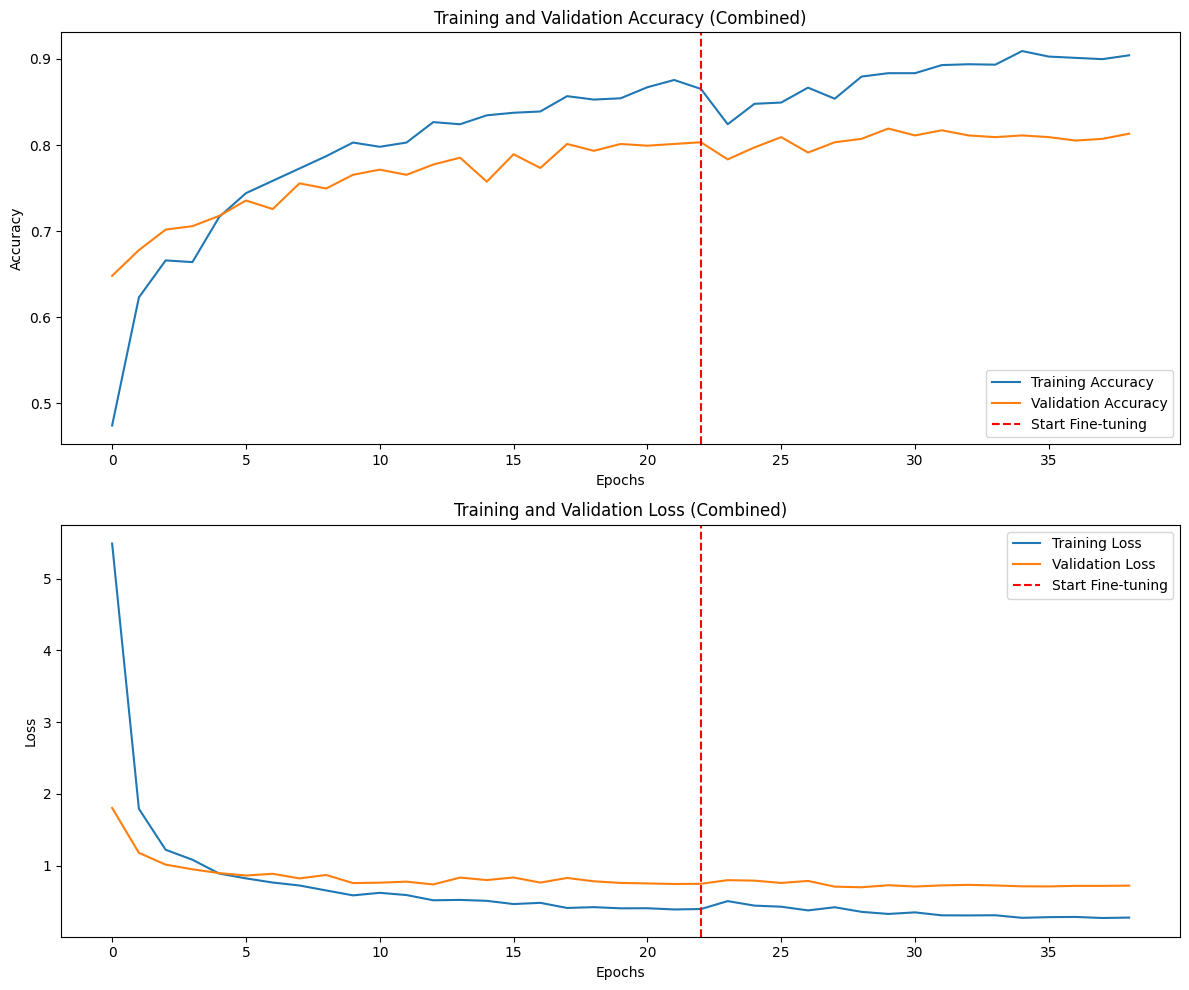

In [19]:
import matplotlib.pyplot as plt

acc_head = history.history.get('accuracy', [])
val_acc_head = history.history.get('val_accuracy', [])
loss_head = history.history.get('loss', [])
val_loss_head = history.history.get('val_loss', [])

acc_ft = history_fine_tune.history.get('accuracy', [])
val_acc_ft = history_fine_tune.history.get('val_accuracy', [])
loss_ft = history_fine_tune.history.get('loss', [])
val_loss_ft = history_fine_tune.history.get('val_loss', [])

total_acc = acc_head + acc_ft
total_val_acc = val_acc_head + val_acc_ft
total_loss = loss_head + loss_ft
total_val_loss = val_loss_head + val_loss_ft

epochs_split_point = len(acc_head)

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(total_acc, label='Training Accuracy')
plt.plot(total_val_acc, label='Validation Accuracy')
if acc_ft:
    plt.axvline(x=epochs_split_point -1 , color='r', linestyle='--', label='Start Fine-tuning')

plt.title('Training and Validation Accuracy (Combined)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(total_loss, label='Training Loss')
plt.plot(total_val_loss, label='Validation Loss')
if loss_ft:
    plt.axvline(x=epochs_split_point -1, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Loss (Combined)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout() # Để các subplot không chồng chéo
plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8037 - loss: 0.8653
Test Accuracy: 80.72%
Test Loss: 0.6982


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step


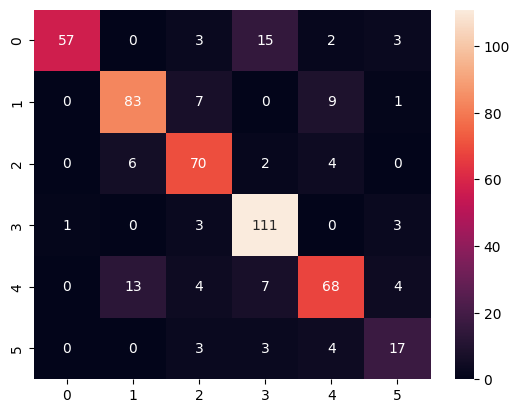

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
import seaborn as sns
import numpy as np
y_true = val_generator.classes
y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob,axis=1)


cfs_mt = confusion_matrix(y_true, y_pred)

plt.figure()

sns.heatmap(cfs_mt, annot = True, fmt = 'd')

plt.show()

In [23]:
model.save('/content/trashClassifierModel.h5')

Saving download (5).jpg to download (5).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted: glass (91.15%)


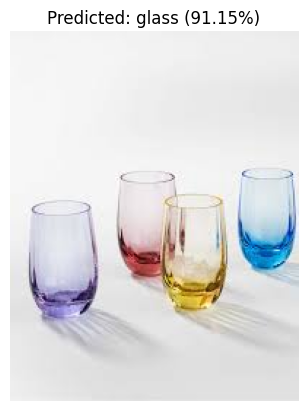

In [25]:
from tensorflow.keras.preprocessing import image
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=image_size, color_mode='rgb')

    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_array_preprocessed = preprocess_input(img_array_expanded.copy())


    prediction = model.predict(img_array_preprocessed)

    class_idx = np.argmax(prediction)
    class_label_predicted = class_labels[class_idx]
    confidence = prediction[0][class_idx]

    print(f"Predicted: {class_label_predicted} ({confidence*100:.2f}%)")

    img_display = Image.open(img_path)
    plt.imshow(img_display)
    plt.title(f"Predicted: {class_label_predicted} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()